# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from mlsim import sp_plot

For pay, we can actually have the count of some positions decline 

In [119]:
t = np.linspace(0,50,11)
count_rate = np.asarray([-.8,-.95,1.25,-.97])
count_pow = np.asarray([1.2,1.3, 1.5,1.1])
count_0 = np.asarray([650,500,450,550])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*4).T
score_rate = np.asarray([.08, .075, .025,.05])
score_0 = [23,28,45,33]
scores_group = np.asarray([score_0 - score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)


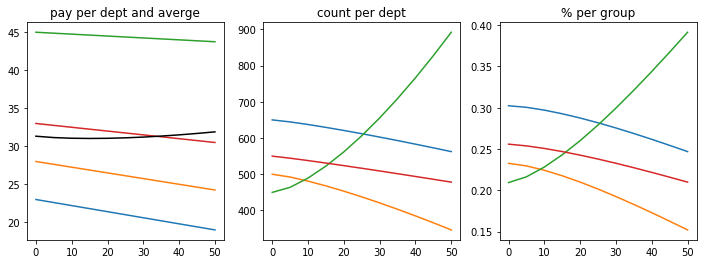

In [120]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('pay per dept and averge');

plt.subplot(1,3,2)
plt.plot(t,count)
plt.title('count per dept');

plt.subplot(1,3,3)
plt.plot(t,share)
plt.title('% per group');

In [121]:
total_score

array([31.3255814 , 31.14686269, 31.05842281, 31.02977431, 31.04992785,
       31.11201449, 31.21088938, 31.34231976, 31.50263302, 31.68854277,
       31.8970555 ])

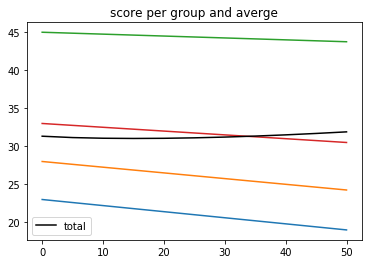

In [133]:
plt.plot(t,scores_group,)
plt.plot(t,total_score,'k', label ='total')
plt.title('score per group and averge');
plt.legend();

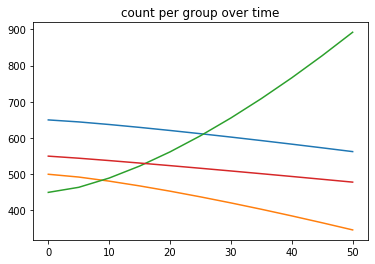

In [123]:
plt.plot(t,count)
plt.title('count per group over time');

We can change the numbers a bit to see tht it still works. 

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [ ]:
roles = [ 'Support',  'Sales','Management' 'R&D',]

shareM = [.625,.55,.625,28]

In [130]:
100/360

0.2777777777777778

In [124]:
dat = [[t_t,np.random.normal(loc=sg,scale=5),g ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) 
           for sg,c,g in zip(sg_t,c_t,group_names) 
           for i in range(int(c))]

In [125]:
len(dat)

18390

In [126]:
df = pd.DataFrame(data=dat,columns = ['month','pay','department'])

In [127]:
df.head()

,month,pay,department
0,0.0,24.206962,W
1,0.0,27.502314,W
2,0.0,21.934148,W
3,0.0,23.689600,W
4,0.0,18.804294,W


In [84]:
df.groupby(['race','year']).mean().unstack()

score                                                              \
year        0.0         5.0         10.0        15.0        20.0        25.0   
race                                                                           
B     270.259828  270.929966  271.934474  272.382984  272.679252  272.345462   
H     264.754538  266.078698  268.148794  269.719082  270.691889  271.674178   
W     309.527144  310.586152  311.317174  311.273369  312.308140  313.056373   

                                                                  
year        30.0        35.0        40.0        45.0        50.0  
race                                                              
B     273.360628  274.153774  274.492500  274.870271  275.649573  
H     272.481985  274.696380  274.425182  276.135526  277.869011  
W     312.368015  313.698911  314.205412  314.081789  315.504846

In [85]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,295.704,294.59806,293.677208,292.375835,291.766763,290.98496,290.108084,290.526284,289.936276,289.764436,290.450742


The overall goes down while each of the groupwise means goes up, as expected.  

In [86]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.275269
     year   0.275269  1.000000
H    score  1.000000  0.564539
     year   0.564539  1.000000
W    score  1.000000  0.311376
     year   0.311376  1.000000

In [87]:
df.corr()

,year,score
year,1.00000,-0.07852
score,-0.07852,1.00000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

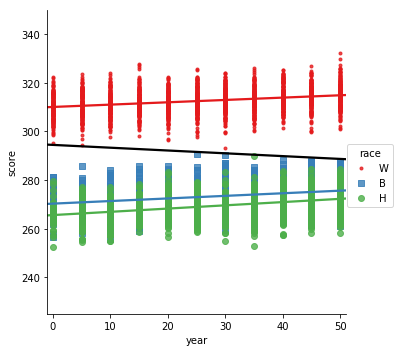

In [42]:
sp_plot(df,'year','score','race',domain_range=[-1, 51, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  

# Generalizing this 

instead of setting a growth rate and being completely computational, we can set the start and end and then add noise in the middle

In [25]:
# set this final value
score_t = (score_0*score_growth*N_t).T
total_t = .85*total_0
count_t = total_t*np.linalg.pinv(score_t)


count = np.linspace(count_0,count_t,N_t)
share = count/np.asarray([np.sum(count, axis=1)]*3).T
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [48]:
N_t = 11
t = np.linspace(0,50,N_t)
group_names = ['W','B','H']
`

count_0 = np.asarray([200,60,40])
count_0

share_0 = count_0/np.asarray([np.sum(count_0)]*3).T
score_0 = np.asarray([310,270,265])
score_growth = [1.1,1.3,1.4]
total_0 = np.sum(share_0*score_0)
total_0

SyntaxError: invalid syntax (<ipython-input-48-b946432f3fc2>, line 4)